   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who             

/var/folders/cr/hqpjhmgj4gg8t2h2mk9r7p280000gn/T/ipykernel_47475/4053785325.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


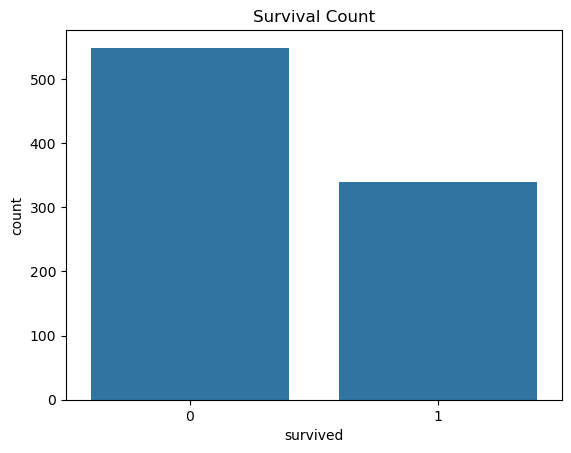

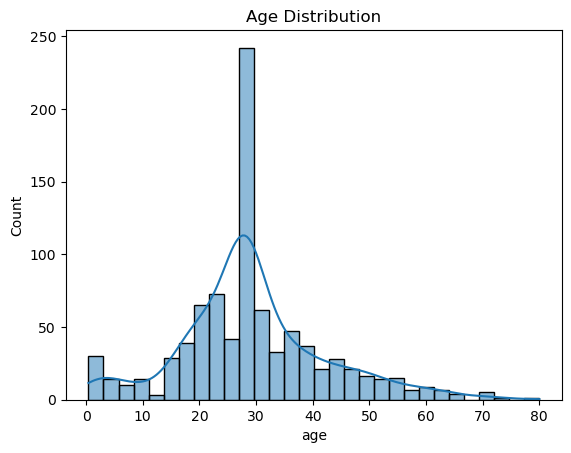

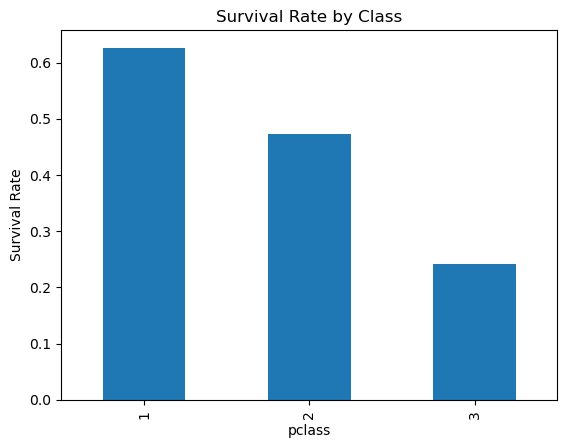

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



In [ ]:
import pandas as pd
import seaborn as sns

# --- Step 1: Load the Dataset ---
df = sns.load_dataset('titanic')

print(df.head())

# --- Step 2: Data Cleaning ---
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Fill missing 'age' values with the median age
df['age'].fillna(df['age'].median(), inplace=True)
# Drop rows with missing 'embarked' values
df.dropna(subset=['embarked'], inplace=True)
print("Data after cleaning:\n", df.head())


(711, 3) (178, 3) (711,) (178,)
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        68

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Report DataFrame:
      pclass   age  sex_male  Actual_Survived  Predicted_Survived
160       3  44.0      True                0                   0
126       3  28.0      True                0                   0
428       3  28.0      True                0                   0
422       3  29.0      True                0                   0
565       3  24.0      True                0                   0


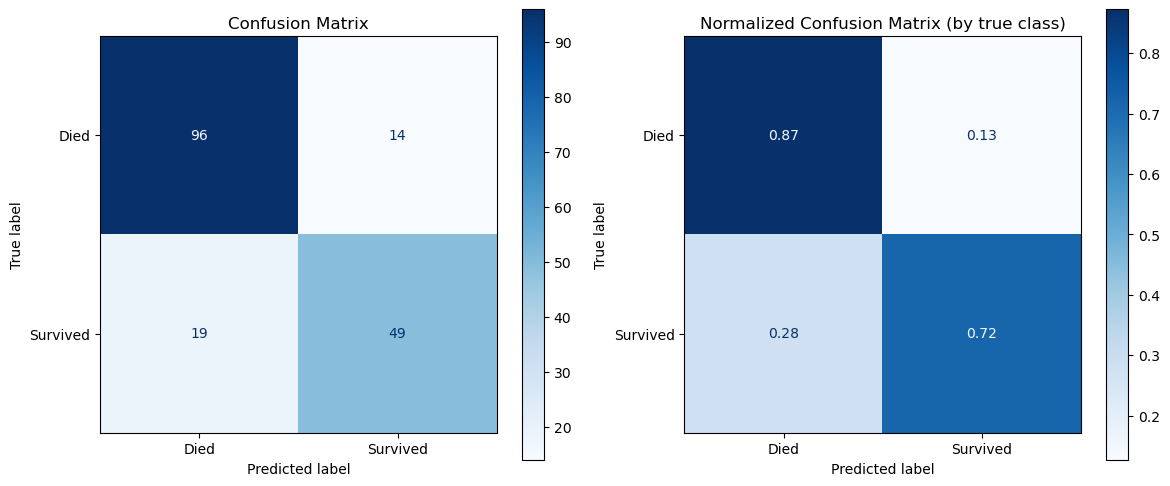

In [16]:

# --- Step 5: Analyze the features of passengers aboard the Titanic (such as age, class, and sex) to predict whether or not they survived the disaster (Binary Classification)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Prepare the data for modeling
features = df[['pclass', 'age', 'sex']]
features = pd.get_dummies(features, drop_first=True)
target = df['survived']
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=42)
#print the shapes of everything
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Step 6: Generate a report about the findings ---
report_df = X_test.copy()
report_df['Actual_Survived'] = y_test
report_df['Predicted_Survived'] = y_pred
print("Report DataFrame:\n", report_df.head())

# Plot confusion matrices (raw and normalized)
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived']).plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay(cm_norm, display_labels=['Died', 'Survived']).plot(ax=axes[1], cmap='Blues', values_format='.2f')
axes[1].set_title('Normalized Confusion Matrix (by true class)')

plt.tight_layout()
plt.show()
